In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import parc as pc

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
results_file = 'write/simple_results.h5ad'  # the file that will store the analysis results

In [4]:
adata = sc.read_csv("full_dataset_biexp_aligned.csv", first_column_names = True)

In [5]:
adata

AnnData object with n_obs × n_vars = 197160 × 13

In [6]:
sc.pp.scale(adata)

In [7]:
sc.tl.pca(adata, svd_solver='auto')

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=12
    finished (0:00:00)


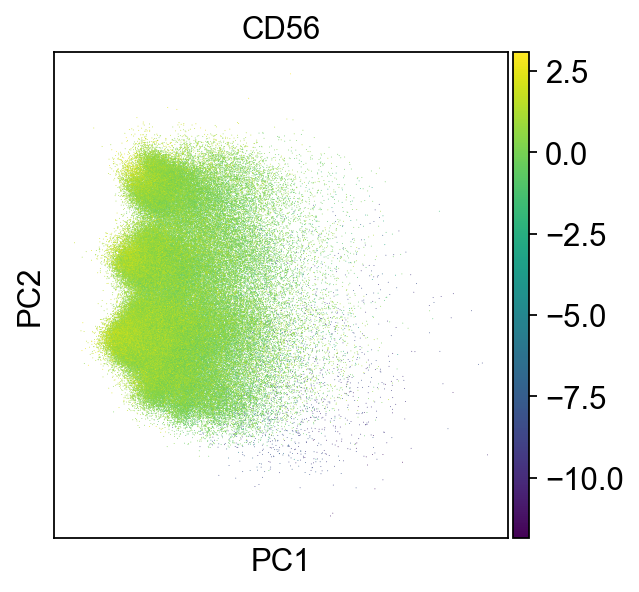

In [8]:
sc.pl.pca(adata, color='CD56')

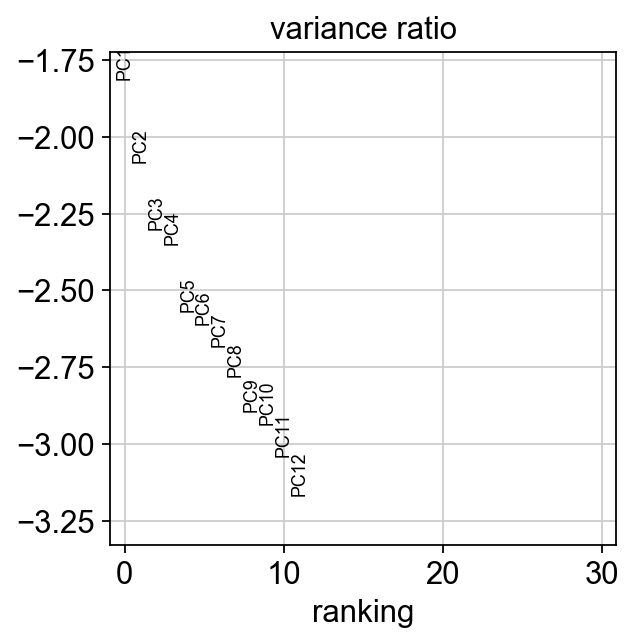

In [9]:
sc.pl.pca_variance_ratio(adata, log=True)

In [10]:
adata.write(results_file)

In [11]:
adata

AnnData object with n_obs × n_vars = 197160 × 13
    var: 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [12]:
sc.pp.neighbors(adata, method='umap',n_neighbors=13, n_pcs=20, key_added='10_neighbors')

computing neighbors
    using data matrix X directly
    finished: added to `.uns['10_neighbors']`
    `.obsp['10_neighbors_distances']`, distances for each pair of neighbors
    `.obsp['10_neighbors_connectivities']`, weighted adjacency matrix (0:06:31)


In [ ]:
sc.tl.umap(adata, min_dist=1, spread=1, neighbors_key='10_neighbors')

computing UMAP


In [ ]:
sc.pl.umap(adata, color=['CD56','GLAST','CD140a'])

In [ ]:
adata.write(results_file)

In [ ]:
sc.tl.leiden(adata, resolution=0.007, neighbors_key='10_neighbors')

In [ ]:
sc.pl.umap(adata, color='leiden')

In [ ]:
adata.write(results_file)